In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [15]:
df = pd.read_csv("Resources/adult.csv")
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
2,3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
3,4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
4,5,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0


In [16]:
df.columns


Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'govt_worker',
       'never_worked', 'private_worker', 'self_employed', 'minor_unemployed',
       'rural_residence', 'urban_residence', 'smoking_unknown',
       'former_smoker', 'never_smoked', 'current_smoker'],
      dtype='object')

In [17]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0


In [19]:
#Create our features

X = df.drop(columns=["stroke"])
y = df["stroke"]

In [20]:
#Create training / testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# BalancedRandomForestClassifier

In [22]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model = brf.fit(X_train, y_train)

In [23]:
# Calculated the balanced accuracy score


y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)


0.7576103357223689

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[707 257]
 [ 12  43]]


In [25]:
# Print the imbalanced classification report
# YOUR CODE HERE

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.73      0.78      0.84      0.76      0.57       964
          1       0.14      0.78      0.73      0.24      0.76      0.58        55

avg / total       0.94      0.74      0.78      0.81      0.76      0.57      1019



In [26]:
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.322386306827738, 'age'),
 (0.1935319211134561, 'avg_glucose_level'),
 (0.1711281019252227, 'bmi'),
 (0.04482747491096608, 'hypertension'),
 (0.030820008804168436, 'heart_disease'),
 (0.03061313869738417, 'gender'),
 (0.023766118223046827, 'former_smoker'),
 (0.023459048128496852, 'ever_married'),
 (0.02132805894125588, 'self_employed'),
 (0.021170338709457264, 'never_smoked'),
 (0.021140719730593092, 'smoking_unknown'),
 (0.02113160959007334, 'urban_residence'),
 (0.021095708894597644, 'private_worker'),
 (0.01954892943241701, 'rural_residence'),
 (0.018260918729696957, 'current_smoker'),
 (0.01579159734142962, 'govt_worker'),
 (0.0, 'never_worked'),
 (0.0, 'minor_unemployed')]

# RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Fit a Random Forests classifier to the data
### YOUR CODE HERE ###

clf = RandomForestClassifier(random_state=1).fit(X_train_scaled,y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 0.9996725605762934
Testing Score: 0.9460255152109912


In [30]:
#Test Brett's personal data

print(clf.predict([[1, 32.0,0,0,1,80.0,25.0, 1, 0,0,0,0,1,0,0,0,0,0]]))

[0]


In [31]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances

feature_importances = clf.feature_importances_

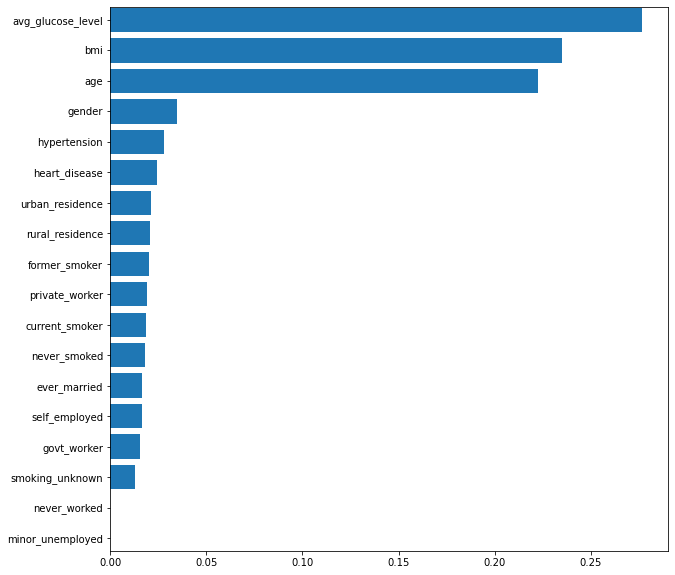

In [32]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Logistic Regression

In [33]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [34]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,govt_worker,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,67.0,0,1,1,228.69,36.6,0,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,0,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,0,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,0,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,0,18.0,0,0,0,82.85,46.9,0,0,1,0,0,0,1,1,0,0,0
4069,0,81.0,0,0,1,125.20,40.0,0,0,0,1,0,0,1,0,0,1,0
4070,0,35.0,0,0,1,82.99,30.6,0,0,0,1,0,1,0,0,0,1,0
4071,1,51.0,0,0,1,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [36]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)

In [37]:
classifier.fit(X_train, y_train)

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200, random_state=1)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9489695780176644


In [40]:
df_lr = pd.DataFrame()

In [41]:
df_lr["Test"] = y_test

In [42]:
df_lr["pred"] = y_pred

In [43]:
df_lr.head(50)

,Test,pred
1395,0,0
3512,0,0
657,0,0
1780,0,0
639,0,0
2774,0,0
1519,0,0
2285,0,0
1840,0,0
3111,0,0


# Neural Networks

In [44]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [45]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu", input_dim=18))
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
96/96 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.9250
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9489
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9492
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9492
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9492
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9499
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9492
Epoch 8/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9502
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9506
Epoch 10/100
96/96 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.9502
Epoch 11/

96/96 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9764
Epoch 84/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9758
Epoch 85/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9771
Epoch 86/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9761
Epoch 87/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9745
Epoch 88/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9784
Epoch 89/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9754
Epoch 90/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9784
Epoch 91/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9761
Epoch 92/100
96/96 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9764
Epoch 93/100


In [47]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

32/32 - 0s - loss: 0.3776 - accuracy: 0.9303 - 153ms/epoch - 5ms/step
Loss: 0.3776140809059143, Accuracy: 0.9303238391876221
